In [26]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [27]:
# Open the tiff image
#pil_img = Image.open("./LC08_L1TP_191035_20190407_20190422_01_T1/LC08_L1TP_191035_20190407_20190422_01_T1_B2.TIF")

def load_color_landsat_image(file_path):
    b2 = imageio.imread(file_path.format("B2"))
    b3 = imageio.imread(file_path.format("B3"))
    b4 = imageio.imread(file_path.format("B4"))
    image = np.stack([np.array(b4), np.array(b3), np.array(b2)], axis=-1) 
    return image

In [28]:
image = load_color_landsat_image("./LC08_L1TP_191034_20190407_20190422_01_T1/LC08_L1TP_191034_20190407_20190422_01_T1_{}.TIF")
#LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810

In [29]:
image.shape

(7761, 7621, 3)

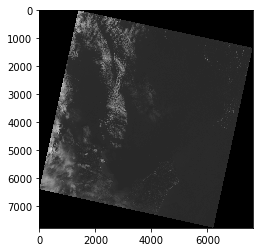

In [30]:
fig, ax1 = plt.subplots(1, 1)

im = ax1.imshow(image[:, :, 2], cmap='gray', interpolation='nearest')

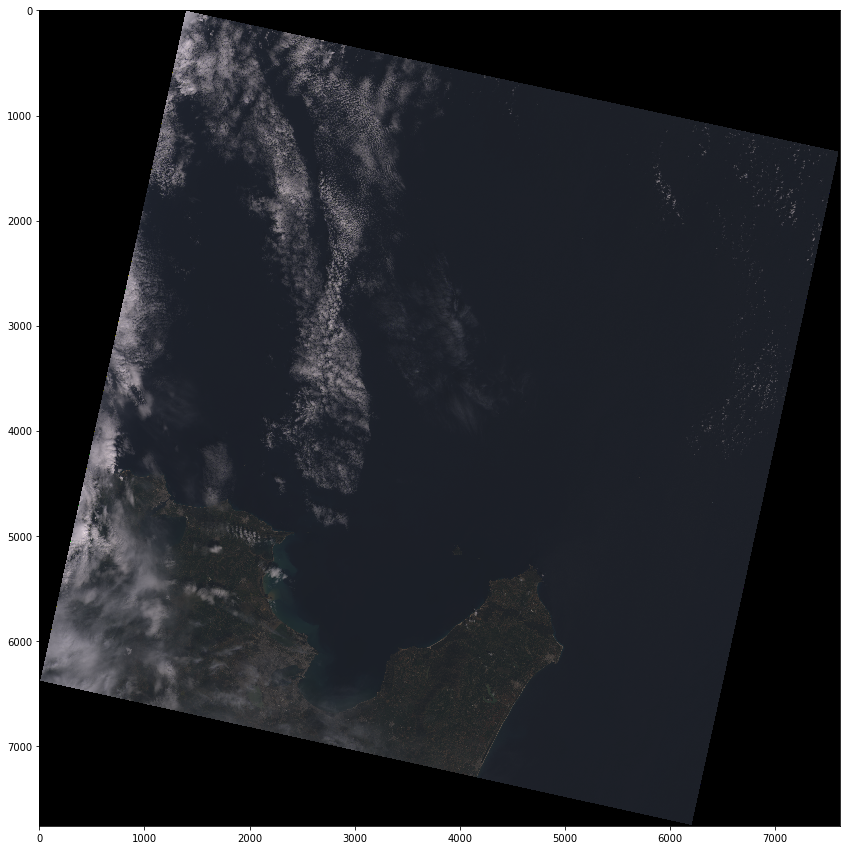

In [6]:
from matplotlib.pyplot import figure

fig, ax1 = plt.subplots(1, 1, figsize=(15,15))
im = ax1.imshow(image / image.max(), interpolation='nearest')

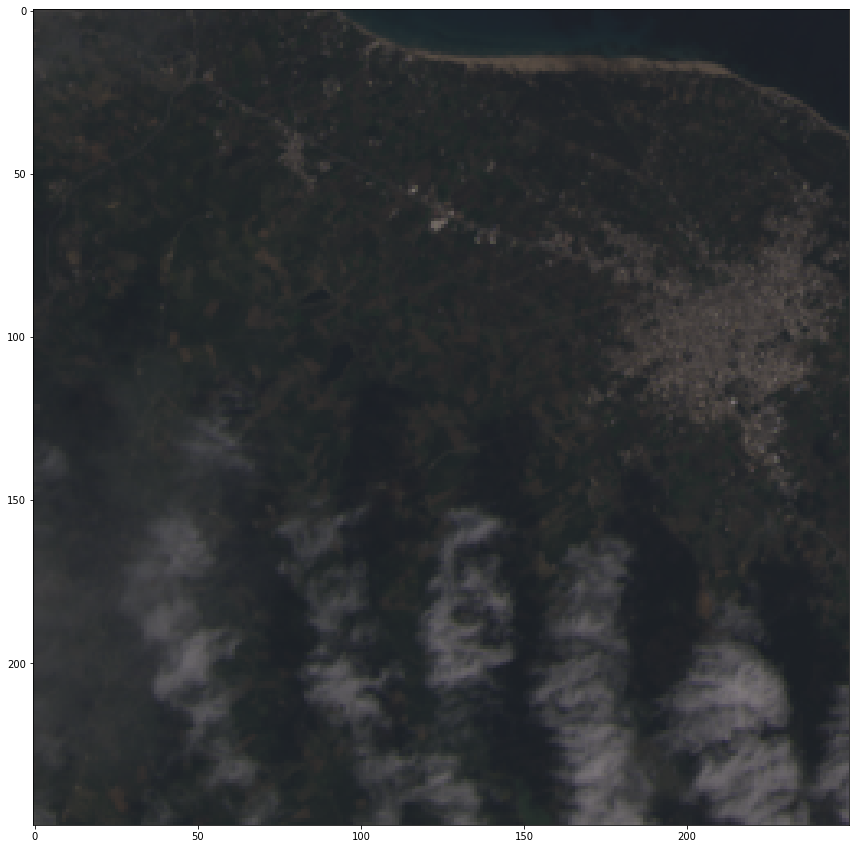

In [7]:
from matplotlib.pyplot import figure

fig, ax1 = plt.subplots(1, 1, figsize=(15,15))
im = ax1.imshow(image[4750:5000, 1750:2000, :] / image.max(), interpolation='nearest')

## These images are not very zoomed so looking into EarthExplorer API

In [8]:
import ee
import numpy as np

In [9]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AY0e-g6sYeAHzA842jxDL0btbOHPAgREWC9OOcXk5ZEHNb962ylmItKoaWM

Successfully saved authorization token.


In [18]:
geometry = ee.Geometry.Rectangle([36.9065, 10.0815, 36.0065, 10.9815])

In [19]:
import folium

image = ee.Image('LANDSAT/LC08/C01/T1_RT_TOA/LC08_191034_20190407')

collection = ee.ImageCollection('COPERNICUS/S2').filterDate('2018-01-01', '2019-01-30').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

            
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

image_viz_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 5000
}

map_l8 = folium.Map(location=[36.8065, 10.1815], zoom_start=13)

map_l8.add_ee_layer(collection.median(), image_viz_params, 'false color composite')
display(map_l8)

In [20]:
image_viz_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': .3
}
map_l8.add_ee_layer(image, image_viz_params, 'false color composite')
display(map_l8)